In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

from datetime import datetime
from api.definer.data import graph

import matplotlib as mpl
mpl.style.use('default')

## Collect Historical Data in USDC-ETH 0.05% Uniswap V3 pool

In [2]:
# USDC-ETH 0.05% Uniswap V3 pool on Ethereum chain
address = "0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640"
after = '2022-01-01'

In [3]:
dpd = graph(address, int(datetime.timestamp(datetime.strptime(after, "%Y-%m-%d"))))
dpd

2021-12-31 16:00:00


,periodStartUnix,liquidity,high,low,close,feeGrowthGlobal0X128,feeGrowthGlobal1X128,pool.totalValueLockedUSD,pool.totalValueLockedToken1,pool.totalValueLockedToken0,pool.token0.decimals,pool.token1.decimals
0,1.704697e+09,1.020673e+19,2223.585381,2213.177931,2223.501097,2.555195e+33,1.237367e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0
1,1.704694e+09,1.020713e+19,2222.846865,2196.065101,2213.155051,2.555175e+33,1.237367e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0
2,1.704690e+09,1.101780e+19,2197.805651,2190.657194,2196.153364,2.555092e+33,1.237343e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0
3,1.704686e+09,1.595604e+19,2198.516132,2190.047997,2197.464306,2.555067e+33,1.237331e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0
4,1.704683e+09,1.861498e+19,2192.565631,2170.724906,2191.682810,2.555033e+33,1.237320e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.701115e+09,2.625623e+19,1996.581927,1988.728433,1995.847202,2.500131e+33,1.213134e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0
996,1.701112e+09,2.643660e+19,2010.528014,1986.377541,1994.531849,2.500087e+33,1.213113e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0
997,1.701108e+09,2.596984e+19,2018.429806,2008.615211,2008.707312,2.500026e+33,1.213069e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0
998,1.701104e+09,2.592683e+19,2023.301771,2010.057618,2010.057618,2.500004e+33,1.213057e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0


The global state also tracks two numbers: feeGrowthGlobal0 (f_g,0) and feeGrowthGlobal1 (f_g,1).     
These represent the total amount of fees that have been earned per unit of virtual liquidity (L), over the entire history of the contract.

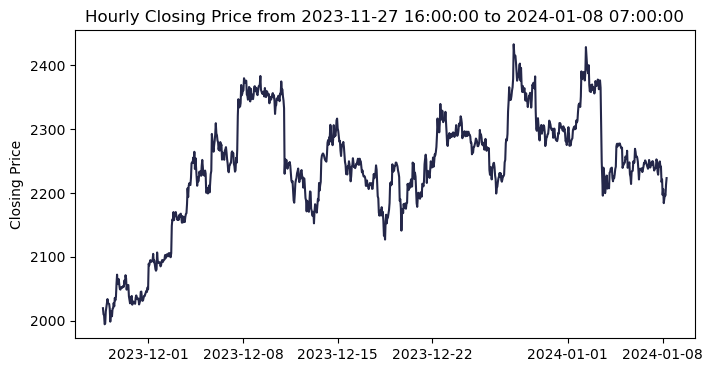

In [4]:
_ = plt.figure(figsize=(8,4))
ax = sns.lineplot(x=pd.to_datetime(dpd.periodStartUnix, unit='s'), y=dpd.close, color='#242749')

plt.rcParams.update({'font.sans-serif':'DejaVu Sans'})

plt.title('Hourly Closing Price from {} to {}'.format(
    datetime.utcfromtimestamp(dpd.periodStartUnix.min()).strftime('%Y-%m-%d %H:%M:%S'), 
    datetime.utcfromtimestamp(dpd.periodStartUnix.max()).strftime('%Y-%m-%d %H:%M:%S')))
plt.ylabel('Closing Price')
plt.xlabel(None)
# plt.savefig('./img/IL_hedge.png', dpi=500, bbox_inches='tight', transparent=True)
plt.show()

In [5]:
decimal0 = dpd.iloc[0]['pool.token0.decimals']
decimal1 = dpd.iloc[0]['pool.token1.decimals']
decimal = decimal1 - decimal0
print("Number of decimals chosen in the Token 0 USDC ERC-20 contract is:", int(decimal0))
print("Number of decimals chosen in the Token 1 ETH ERC-20 contract is:", int(decimal1))
print(int(decimal))

Number of decimals chosen in the Token 0 USDC ERC-20 contract is: 6
Number of decimals chosen in the Token 1 ETH ERC-20 contract is: 18
12


In [6]:
dpd['fg0'] = ((dpd['feeGrowthGlobal0X128']) / (2 ** 128)) / (10 ** decimal0)
dpd['fg1'] = ((dpd['feeGrowthGlobal1X128']) / (2 ** 128)) / (10 ** decimal1)

In [7]:
n = 1
mini = 1982.32
maxi = 2519.99
target = dpd['close'].iloc[-1] * n
base = 0

Calculate F0G and F1G (fee earned by an unbounded unit of liquidity in one period):

In [8]:
dpd['fg0shift'] = dpd['fg0'].shift(-1)
dpd['fg1shift'] = dpd['fg1'].shift(-1)
dpd.tail()

,periodStartUnix,liquidity,high,low,close,feeGrowthGlobal0X128,feeGrowthGlobal1X128,pool.totalValueLockedUSD,pool.totalValueLockedToken1,pool.totalValueLockedToken0,pool.token0.decimals,pool.token1.decimals,fg0,fg1,fg0shift,fg1shift
995,1.701115e+09,2.625623e+19,1996.581927,1988.728433,1995.847202,2.500131e+33,1.213134e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0,0.0,0.0,0.0,0.0
996,1.701112e+09,2.643660e+19,2010.528014,1986.377541,1994.531849,2.500087e+33,1.213113e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0,0.0,0.0,0.0,0.0
997,1.701108e+09,2.596984e+19,2018.429806,2008.615211,2008.707312,2.500026e+33,1.213069e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0,0.0,0.0,0.0,0.0
998,1.701104e+09,2.592683e+19,2023.301771,2010.057618,2010.057618,2.500004e+33,1.213057e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0,0.0,0.0,0.0,0.0
999,1.701101e+09,2.650382e+19,2019.876311,2002.418470,2019.707214,2.499986e+33,1.213039e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0,0.0,0.0,NaN,NaN


In [9]:
dpd['fee0token'] = dpd['fg0'] - dpd['fg0shift']
dpd['fee1token'] = dpd['fg1'] - dpd['fg1shift']
dpd.tail()

,periodStartUnix,liquidity,high,low,close,feeGrowthGlobal0X128,feeGrowthGlobal1X128,pool.totalValueLockedUSD,pool.totalValueLockedToken1,pool.totalValueLockedToken0,pool.token0.decimals,pool.token1.decimals,fg0,fg1,fg0shift,fg1shift,fee0token,fee1token
995,1.701115e+09,2.625623e+19,1996.581927,1988.728433,1995.847202,2.500131e+33,1.213134e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
996,1.701112e+09,2.643660e+19,2010.528014,1986.377541,1994.531849,2.500087e+33,1.213113e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
997,1.701108e+09,2.596984e+19,2018.429806,2008.615211,2008.707312,2.500026e+33,1.213069e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
998,1.701104e+09,2.592683e+19,2023.301771,2010.057618,2010.057618,2.500004e+33,1.213057e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
999,1.701101e+09,2.650382e+19,2019.876311,2002.418470,2019.707214,2.499986e+33,1.213039e+42,3.816098e+08,74539.661255,2.162791e+08,6.0,18.0,0.0,0.0,NaN,NaN,NaN,NaN


Calculate my liquidity:

In [10]:
print("Lower bound of price range:", mini)
print("Upper bound of price range:", maxi)
SMIN = np.sqrt(mini * 10 ** decimal)
SMAX = np.sqrt(maxi * 10 ** decimal)

Lower bound of price range: 1982.32
Upper bound of price range: 2519.99


In [11]:
print("Starting datetime:", 
      datetime.utcfromtimestamp(dpd.periodStartUnix.iloc[-1]).strftime('%Y-%m-%d %H:%M:%S'))

Starting datetime: 2023-11-27 16:00:00


In [12]:
initial_price = dpd['close'].iloc[-1]
print("Starting (initial) price:", dpd['close'].iloc[-1])

Starting (initial) price: 2019.707214262394


In [13]:
if base == 0:  # Token 0 USDC as the base token

    sqrt0 = np.sqrt(dpd['close'].iloc[-1] * 10 ** decimal)
    dpd['price0'] = dpd['close']

else:

    sqrt0 = np.sqrt(1 / dpd['close'].iloc[-1] * 10 ** decimal)
    dpd['price0'] = 1 / dpd['close']


if SMIN < sqrt0 < SMAX:

    deltaL = target / ((sqrt0 - SMIN) + (((1 / sqrt0) - (1 / SMAX)) * (dpd['price0'].iloc[-1] * 10 ** decimal)))
    amount1 = deltaL * (sqrt0 - SMIN)
    amount0 = deltaL * ((1 / sqrt0) - (1 / SMAX)) * 10 ** decimal

elif sqrt0 < SMIN:

    deltaL = target / (((1 / SMIN) - (1 / SMAX)) * (dpd['price0'].iloc[-1]))
    amount1 = 0
    amount0 = deltaL * ((1 / SMIN) - (1 / SMAX))

else:
    
    deltaL = target / (SMAX - SMIN)
    amount1 = deltaL * (SMAX - SMIN)
    amount0 = 0
    
print("Initial amount of Token 0:", round(amount0, 3))
print("Initial amount of Token 1:", round(amount1, 3))
print("Initial net liquidity:", round(deltaL, 6))

Initial amount of Token 0: 0.918
Initial amount of Token 1: 164.676
Initial net liquidity: 0.000394


In [14]:
# Use 'get_liquidity' function to calculate liquidity as a function of amounts and price range
def get_liquidity0(sqrtA, sqrtB, amount0, decimals):
    # swap boundaries if not ordered
    (sqrtA, sqrtB) = (sqrtB, sqrtA) if sqrtA > sqrtB else (sqrtA, sqrtB)

    liquidity = amount0 / ((2 ** 96 * (sqrtB - sqrtA) / sqrtB / sqrtA) / 10 ** decimals)
    
    return liquidity


def get_liquidity1(sqrtA, sqrtB, amount1, decimals):
    # swap boundaries if not ordered
    (sqrtA, sqrtB) = (sqrtB, sqrtA) if sqrtA > sqrtB else (sqrtA, sqrtB)

    liquidity = amount1 / ((sqrtB - sqrtA) / 2 ** 96 / 10 ** decimals)
    
    return liquidity


def get_liquidity(asqrt, asqrtA, asqrtB, amount0, amount1, decimal0, decimal1):
    sqrt = (np.sqrt(asqrt * 10 ** (decimal1 - decimal0))) * (2 ** 96)  # initial price
    sqrtA = np.sqrt(asqrtA * 10 ** (decimal1 - decimal0)) * (2 ** 96)  # lower bound of price range
    sqrtB = np.sqrt(asqrtB * 10 ** (decimal1 - decimal0)) * (2 ** 96)  # upper bound of price range
    
    # swap boundaries if not ordered
    (sqrtA, sqrtB) = (sqrtB, sqrtA) if sqrtA > sqrtB else (sqrtA, sqrtB)

    if sqrt <= sqrtA:  # lower than lower bound

        liquidity0 = get_liquidity0(sqrtA, sqrtB, amount0, decimal0)
        
        return liquidity0

    elif sqrtB > sqrt > sqrtA:  # within the price range

        liquidity0 = get_liquidity0(sqrt, sqrtB, amount0, decimal0)
        liquidity1 = get_liquidity1(sqrtA, sqrt, amount1, decimal1)
        liquidity = liquidity0 if liquidity0 < liquidity1 else liquidity1
        
        return liquidity

    else:  # higher than upper bound
        
        liquidity1 = get_liquidity1(sqrtA, sqrtB, amount1, decimal1)
        
        return liquidity1

In [15]:
# print((dpd['price0'].iloc[-1], mini, maxi, amount0, amount1, decimal0, decimal1))
myliquidity = get_liquidity(dpd['price0'].iloc[-1], mini, maxi, amount0, amount1, decimal0, decimal1)
print("Liquidity position:", myliquidity)

Liquidity position: 394055177424624.75


In [16]:
def get_amount0(sqrtA, sqrtB, liquidity, decimals):
    # swap boundaries if not ordered
    (sqrtA, sqrtB) = (sqrtB, sqrtA) if sqrtA > sqrtB else (sqrtA, sqrtB)

    amount0 = (liquidity * 2 ** 96 * (sqrtB - sqrtA) / sqrtB / sqrtA) / 10 ** decimals

    return amount0


def get_amount1(sqrtA, sqrtB, liquidity, decimals):
    # swap boundaries if not ordered
    (sqrtA, sqrtB) = (sqrtB, sqrtA) if sqrtA > sqrtB else (sqrtA, sqrtB)

    amount1 = liquidity * (sqrtB - sqrtA) / 2 ** 96 / 10 ** decimals

    return amount1


def get_amounts(asqrt, asqrtA, asqrtB, liquidity, decimal0, decimal1):
    sqrt = (np.sqrt(asqrt * 10 ** (decimal1 - decimal0))) * (2 ** 96)
    sqrtA = np.sqrt(asqrtA * 10 ** (decimal1 - decimal0)) * (2 ** 96)
    sqrtB = np.sqrt(asqrtB * 10 ** (decimal1 - decimal0)) * (2 ** 96)

    # swap boundaries if not ordered
    (sqrtA, sqrtB) = (sqrtB, sqrtA) if sqrtA > sqrtB else (sqrtA, sqrtB)

    if sqrt <= sqrtA:

        amount0 = get_amount0(sqrtA, sqrtB, liquidity, decimal0)
        
        return amount0, 0

    elif sqrtB > sqrt > sqrtA:
        
        amount0 = get_amount0(sqrt, sqrtB, liquidity, decimal0)
        amount1 = get_amount1(sqrtA, sqrt, liquidity, decimal1)

        return amount0, amount1

    else:
        
        amount1 = get_amount1(sqrtA, sqrtB, liquidity, decimal1)
        
        return 0, amount1

Calculate active liquidity, amounts of Token 0 and 1 at each time step:

In [17]:
dpd[['ActiveLiq', 'amount0', 'amount1', 'amount0unb', 'amount1unb']] = 0

if base == 0:
    
    for i, row in dpd.iterrows():
        
        if dpd['high'].iloc[i] > mini and dpd['low'].iloc[i] < maxi:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = (
                    (min(maxi, dpd['high'].iloc[i]) - max(dpd['low'].iloc[i], mini)) / 
                    (dpd['high'].iloc[i] - dpd['low'].iloc[i]) * 100)
        else:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = 0

        amounts = get_amounts(dpd['price0'].iloc[i], mini, maxi, myliquidity, decimal0, decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0')] = amounts[1]
        dpd.iloc[i, dpd.columns.get_loc('amount1')] = amounts[0]

        amountsunb = get_amounts((dpd['price0'].iloc[i]), 1.0001 ** (-887220), 1.0001 ** 887220, 1, decimal0, decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0unb')] = amountsunb[1]
        dpd.iloc[i, dpd.columns.get_loc('amount1unb')] = amountsunb[0]
        
else:
    
    for i, row in dpd.iterrows():

        if (1 / dpd['low'].iloc[i]) > mini and (1 / dpd['high'].iloc[i]) < maxi:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = (min(maxi, 1 / dpd['low'].iloc[i]) - max(
                1 / dpd['high'].iloc[i], mini)) / ((1 / dpd['low'].iloc[i]) - (1 / dpd['high'].iloc[i])) * 100
        else:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = 0

        amounts = get_amounts((dpd['price0'].iloc[i] * 10 ** decimal), mini, maxi, myliquidity, decimal0, decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0')] = amounts[0]
        dpd.iloc[i, dpd.columns.get_loc('amount1')] = amounts[1]

        amountsunb = get_amounts((dpd['price0'].iloc[i]), 1.0001 ** (-887220), 1.0001 ** 887220, 1, decimal0, decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0unb')] = amountsunb[0]
        dpd.iloc[i, dpd.columns.get_loc('amount1unb')] = amountsunb[1]

Final fee calculation:

In [18]:
dpd['myfee0'] = dpd['fee0token'] * myliquidity * dpd['ActiveLiq'] / 100
dpd['myfee1'] = dpd['fee1token'] * myliquidity * dpd['ActiveLiq'] / 100

print(dpd['myfee0'].sum())
print(dpd['myfee1'].sum())

63.9333643444565
0.028173085487094032


In [19]:
if base == 0:
    
    dpd['feeV'] = dpd['myfee0'] + dpd['myfee1'] * dpd['close']
    dpd['amountV'] = dpd['amount0'] + dpd['amount1'] * dpd['close']
    dpd['amountunb'] = dpd['amount0unb'] + dpd['amount1unb'] * dpd['close']
    dpd['fgV'] = dpd['fee0token'] + dpd['fee1token'] * dpd['close']
    
    dpd['feeusd'] = dpd['feeV'] * (
            dpd['pool.totalValueLockedUSD'].iloc[0] / 
            (dpd['pool.totalValueLockedToken1'].iloc[0] * dpd['close'].iloc[0] + (dpd['pool.totalValueLockedToken0'].iloc[0]))
    )

else:

    dpd['feeV'] = dpd['myfee0'] / dpd['close'] + dpd['myfee1']
    dpd['amountV'] = dpd['amount0'] / dpd['close'] + dpd['amount1']
    dpd['feeVbase0'] = dpd['myfee0'] + dpd['myfee1'] * dpd['close']
    dpd['amountunb'] = dpd['amount0unb'] / dpd['close'] + dpd['amount1unb']
    dpd['fgV'] = dpd['fee0token'] / dpd['close'] + dpd['fee1token']
    
    dpd['feeusd'] = dpd['feeV'] * (
            dpd['pool.totalValueLockedUSD'].iloc[0] / 
            (dpd['pool.totalValueLockedToken1'].iloc[0] + (dpd['pool.totalValueLockedToken0'].iloc[0] / dpd['close'].iloc[0]))
    )

In [20]:
# dpd['fgV']= (dpd['fg0'] / dpd['close'].iloc[0] + dpd['fg1'])
# print(dpd['fg1'] / dpd['amount1unb'])

dpd['date'] = pd.to_datetime(dpd['periodStartUnix'], unit='s')

# Visualization

In [21]:
data = dpd[['date', 'myfee0', 'myfee1', 'fgV', 'feeV', 'feeusd', 
            'amountV', 'ActiveLiq', 'amountunb', 'amount0', 'amount1', 'close']]
data = data.fillna(0)
data

,date,myfee0,myfee1,fgV,feeV,feeusd,amountV,ActiveLiq,amountunb,amount0,amount1,close
0,2024-01-08 07:00:00,0.022965,5.817544e-07,6.156174e-17,0.024259,0.024233,2163.948878,100,9.430803e-11,1036.665502,0.506986,2223.501097
1,2024-01-08 06:00:00,0.096461,2.740084e-05,3.986828e-16,0.157103,0.156935,2158.602771,100,9.408836e-11,993.385343,0.526496,2213.155051
2,2024-01-08 05:00:00,0.029000,1.448964e-05,1.543474e-16,0.060821,0.060756,2149.376889,100,9.372627e-11,922.042626,0.558856,2196.153364
3,2024-01-08 04:00:00,0.039847,1.261865e-05,1.714879e-16,0.067576,0.067503,2150.107873,100,9.375424e-11,927.553425,0.556348,2197.464306
4,2024-01-08 03:00:00,0.101431,3.934345e-05,4.762252e-16,0.187659,0.187458,2146.859342,100,9.363082e-11,903.237417,0.567428,2191.682810
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-11-27 20:00:00,0.051313,2.428535e-05,2.532202e-16,0.099783,0.099676,1997.171057,100,8.934981e-11,59.759797,0.970721,1995.847202
996,2023-11-27 19:00:00,0.070576,5.093867e-05,4.369299e-16,0.172174,0.171990,1995.892304,100,8.932036e-11,53.957805,0.973629,1994.531849
997,2023-11-27 18:00:00,0.025071,1.406470e-05,1.353171e-16,0.053322,0.053265,2009.472501,100,8.963721e-11,116.385054,0.942441,2008.707312
998,2023-11-27 17:00:00,0.020829,2.068918e-05,1.583919e-16,0.062415,0.062348,2010.743090,100,8.966733e-11,122.320152,0.939487,2010.057618


In [22]:
dpd_sum = data.resample('D', on='date').sum()
dpd_mean = data.resample('D', on='date').mean()
dpd_first = data.resample('D', on='date').first()
dpd_last = data.resample('D', on='date').last()

In [23]:
final1 = dpd_sum[['myfee0', 'myfee1', 'feeV', 'fgV', 'feeusd']].copy()  # sum monthly
final1['ActiveLiq'] = dpd_mean['ActiveLiq'].copy()  # average monthly
final1[['amountV', 'amountunb']] = dpd_first[['amountV', 'amountunb']].copy()  # first of each month
# use the amount at the last hour for the day, similar to the first for the next day
final1[['amountVlast']] = dpd_last[['amountV']]  # last of each month

final1['S1%'] = final1['feeV'] / final1['amountV'] * 100  # *365
final1['unb%'] = final1['fgV'] / final1['amountunb'] * 100  # *365
final1['multiplier'] = final1['S1%'] / final1['unb%']
final1['feeunb'] = final1['amountV'] * final1['unb%'] / 100

# final1.to_csv("chart1.csv", sep=";")
print("This position returned {}%".format(round(final1['feeV'].sum() / final1['amountV'].iloc[0] * 100, 2)), 
      "in {} days, for an APR of".format(len(final1.index)),
      "{}%".format(round(final1['feeV'].sum() / final1['amountV'].iloc[0] * 365 / len(final1.index) * 100, 2)))
print("A base position returned", round(final1['feeunb'].sum() / final1['amountV'].iloc[0] * 100, 2), "in", len(final1.index), 
      "days, for an APR of", round(final1['feeunb'].sum() / final1['amountV'].iloc[0] * 365 / len(final1.index) * 100, 2))

print("Fee in token 1: {}, and token 2: {}".format(round(dpd['myfee0'].sum(), 2), round(dpd['myfee1'].sum(), 4)))
print("Total fee in USD", round(final1['feeusd'].sum(), 3))
print('Liquidity was active for: {}%'.format(final1['ActiveLiq'].mean()))

# forecast = (dpd['feeVbase0'].sum() * myliquidity * final1['ActiveLiq'].mean())
# print(dpd['feeVbase0'])
# print('forecast: ', forecast)

This position returned 6.31% in 43 days, for an APR of 53.56%
A base position returned 0.37 in 43 days, for an APR of 3.11
Fee in token 1: 63.93, and token 2: 0.0282
Total fee in USD 127.296
Liquidity was active for: 100.0%


In [24]:
final1

,myfee0,myfee1,feeV,fgV,feeusd,ActiveLiq,amountV,amountunb,amountVlast,S1%,unb%,multiplier,feeunb
date,,,,,,,,,,,,,
2023-11-27,0.287093,0.000135,0.556872,1.413182e-15,0.556276,100.0,2019.707214,8.988231e-11,2026.793578,0.027572,0.001572,17.536496,0.031755
2023-11-28,0.968372,0.000452,1.890580,4.797755e-15,1.888560,100.0,2032.582308,9.019899e-11,2045.536133,0.093014,0.005319,17.486810,0.108115
2023-11-29,0.758947,0.000393,1.562087,3.964133e-15,1.560418,100.0,2047.953068,9.059045e-11,2027.656446,0.076276,0.004376,17.430885,0.089616
2023-11-30,0.603029,0.000271,1.153874,2.928205e-15,1.152641,100.0,2027.177188,9.006486e-11,2048.479350,0.056920,0.003251,17.507362,0.065908
2023-12-01,0.905613,0.000397,1.736105,4.405740e-15,1.734249,100.0,2045.936443,9.053820e-11,2076.702510,0.084856,0.004866,17.438004,0.099559
2023-12-02,1.010936,0.000393,1.853616,4.703951e-15,1.851635,100.0,2080.999157,9.149010e-11,2131.206290,0.089073,0.005141,17.324442,0.106994
2023-12-03,0.854915,0.000365,1.649869,4.186899e-15,1.648106,100.0,2132.193905,9.309960e-11,2148.010893,0.077379,0.004497,17.205930,0.095890
2023-12-04,3.114934,0.001348,6.128643,1.555275e-14,6.122093,100.0,2157.701707,9.405209e-11,2173.293122,0.284036,0.016536,17.176476,0.356804
2023-12-05,2.380519,0.001012,4.660142,1.182612e-14,4.655162,100.0,2177.619370,9.490957e-11,2194.499954,0.214002,0.012460,17.174538,0.271340


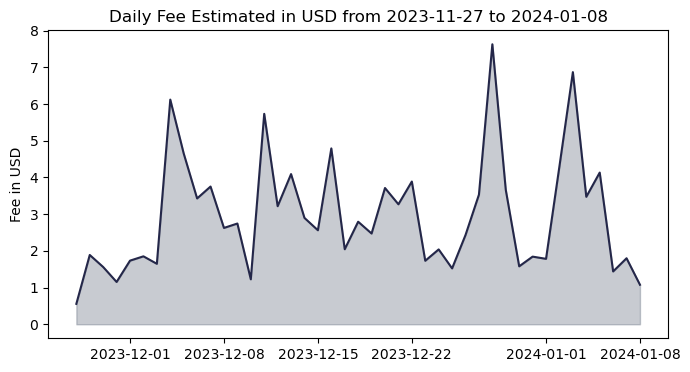

In [39]:
_ = plt.figure(figsize=(8,4))
ax = sns.lineplot(x=final1.index, y=final1.feeusd, color='#242749')

ax.fill_between(final1.index, 0, list(final1.feeusd), color='#4B5569', alpha=0.3)

plt.rcParams.update({'font.sans-serif':'DejaVu Sans'})

plt.title('Daily Fee Estimated in USD from {} to {}'.format(
    datetime.utcfromtimestamp(dpd.periodStartUnix.min()).strftime('%Y-%m-%d'), 
    datetime.utcfromtimestamp(dpd.periodStartUnix.max()).strftime('%Y-%m-%d')))
plt.ylabel('Fee in USD')
plt.xlabel(None)
# plt.savefig('./img/IL_hedge.png', dpi=500, bbox_inches='tight', transparent=True)
plt.show()

In [26]:
final2 = dpd_first[['amountV', 'amount0', 'amount1', 'close']].copy()
final2['feeV'] = dpd_sum['feeV'].copy()
final2[['amountVlast']] = dpd_last[['amountV']]

final2['HODL'] = final2['amount0'].iloc[0] + final2['amount1'].iloc[0] * final2['close']
final2['IL'] = final2['amountVlast'] - final2['HODL']
final2['ActiveLiq'] = dpd_mean['ActiveLiq'].copy()
final2['feecumsum'] = final2['feeV'].cumsum()
final2['PNL'] = final2['feecumsum'] + final2['IL']  # -Bfinal['gas']

final2['HODLnorm'] = final2['HODL'] / final2['amountV'].iloc[0] * 100
final2['ILnorm'] = final2['IL'] / final2['amountV'].iloc[0] * 100
final2['PNLnorm'] = final2['PNL'] / final2['amountV'].iloc[0] * 100
final2['feecumsumnorm'] = final2['feecumsum'] / final2['amountV'].iloc[0] * 100

# ch2 = final2[['amountV', 'feecumsum']]
# ch3 = final2[['ILnorm', 'PNLnorm', 'feecumsumnorm']]
# final2.to_csv("chart2.csv", sep=";")
final2

,amountV,amount0,amount1,close,feeV,amountVlast,HODL,IL,ActiveLiq,feecumsum,PNL,HODLnorm,ILnorm,PNLnorm,feecumsumnorm
date,,,,,,,,,,,,,,,
2023-11-27,2019.707214,164.675832,0.918465,2019.707214,0.556872,2026.793578,2019.707214,7.086364,100.0,0.556872,7.643235,100.000000,0.350861,0.378433,0.027572
2023-11-28,2032.582308,227.072163,0.887680,2033.964624,1.890580,2045.536133,2032.802153,12.733980,100.0,2.447452,15.181432,100.648358,0.630486,0.751665,0.121179
2023-11-29,2047.953068,304.199583,0.849924,2051.657354,1.562087,2027.656446,2049.052315,-21.395869,100.0,4.009539,-17.386330,101.452938,-1.059355,-0.860834,0.198521
2023-11-30,2027.177188,200.644549,0.900693,2027.919857,1.153874,2048.479350,2027.250243,21.229107,100.0,5.163413,26.392521,100.373471,1.051098,1.306750,0.255652
2023-12-01,2045.936443,293.906050,0.854944,2049.291627,1.736105,2076.702510,2046.879476,29.823033,100.0,6.899518,36.722551,101.345356,1.476602,1.818212,0.341610
2023-12-02,2080.999157,481.456274,0.764377,2092.609735,1.853616,2131.206290,2086.665664,44.540626,100.0,8.753134,53.293761,103.315255,2.205301,2.638687,0.433386
2023-12-03,2132.193905,798.571590,0.615456,2166.883879,1.649869,2148.010893,2154.883903,-6.873010,100.0,10.403003,3.529993,106.692885,-0.340297,0.174777,0.515075
2023-12-04,2157.701707,986.238155,0.529727,2211.448850,6.128643,2173.293122,2195.815290,-22.522167,100.0,16.531646,-5.990521,108.719485,-1.115120,-0.296603,0.818517
2023-12-05,2177.619370,1155.184925,0.454021,2251.956453,4.660142,2194.499954,2233.020125,-38.520171,100.0,21.191789,-17.328383,110.561576,-1.907216,-0.857965,1.049251


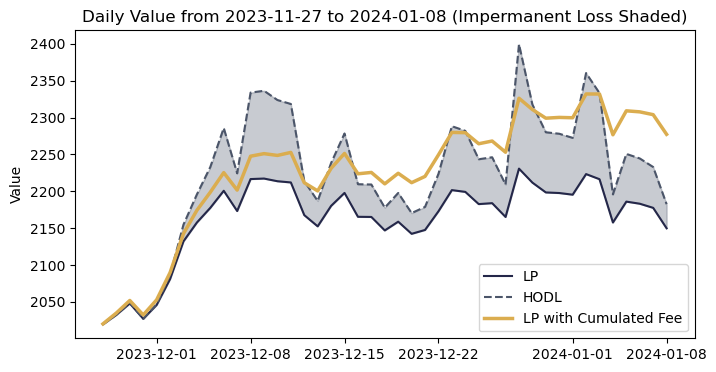

In [37]:
_ = plt.figure(figsize=(8,4))
ax = sns.lineplot(x=final2.index, y=final2.amountV, label='LP', color='#242749')
sns.lineplot(x=final2.index, y=final2.HODL, label='HODL', color='#4B5569', linestyle='--')
sns.lineplot(x=final2.index, y=final2.amountV + final2.feecumsum, label='LP with Cumulated Fee', color='#DBAD4F', linewidth=2.5)

ax.fill_between(final2.index, list(final2.amountV), list(final2.HODL), color='#4B5569', alpha=0.3)

plt.rcParams.update({'font.sans-serif':'DejaVu Sans'})

plt.title('Daily Value from {} to {} (Impermanent Loss Shaded)'.format(
    datetime.utcfromtimestamp(dpd.periodStartUnix.min()).strftime('%Y-%m-%d'), 
    datetime.utcfromtimestamp(dpd.periodStartUnix.max()).strftime('%Y-%m-%d')))
plt.ylabel('Value')
plt.xlabel(None)
# plt.savefig('./img/IL_hedge.png', dpi=500, bbox_inches='tight', transparent=True)
plt.show()

In [28]:
final3 = pd.DataFrame()
final3['amountV'] = data['amountV']

final3['amountVlast'] = data['amountV'].shift(-1)
final3['date'] = data['date']
final3['close'] = data['close']
final3['HODL'] = data['amount0'].iloc[-1] + data['amount1'].iloc[-1] * data['close']
# final3['HODL'] = data['amount0'].iloc[0] / data['close'] + data['amount1'].iloc[0]

final3['amountVlast'].iloc[-1] = final3['HODL'].iloc[-1]
final3['IL'] = final3['amountVlast'] - final3['HODL']
final3['feecumsum'] = data['feeV'][::-1].cumsum()
final3['PNL'] = final3['feecumsum'] + final3['IL']
final3['HODLnorm'] = final3['HODL'] / final3['amountV'].iloc[0] * 100
final3['ILnorm'] = final3['IL'] / final3['amountV'].iloc[0] * 100
final3['PNLnorm'] = final3['PNL'] / final3['amountV'].iloc[0] * 100
final3['feecumsumnorm'] = final3['feecumsum'] / final3['amountV'].iloc[0] * 100

# ch2 = final3[['amountV', 'feecumsum']]
# ch3 = final3[['ILnorm', 'PNLnorm', 'feecumsumnorm']]
final3

/var/folders/s0/gcg7k5ws6hxfgnzww6_ryn0c0000gn/T/ipykernel_39949/186161116.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final3['amountVlast'].iloc[-1] = final3['HODL'].iloc[-1]


,amountV,amountVlast,date,close,HODL,IL,feecumsum,PNL,HODLnorm,ILnorm,PNLnorm,feecumsumnorm
0,2163.948878,2158.602771,2024-01-08 07:00:00,2223.501097,2206.884863,-48.282093,127.432685,79.150592,101.984150,-2.231203,3.657692,5.888895
1,2158.602771,2149.376889,2024-01-08 06:00:00,2213.155051,2197.382377,-48.005488,127.408426,79.402938,101.545023,-2.218421,3.669354,5.887774
2,2149.376889,2150.107873,2024-01-08 05:00:00,2196.153364,2181.766914,-31.659040,127.251323,95.592283,100.823404,-1.463022,4.417493,5.880514
3,2150.107873,2146.859342,2024-01-08 04:00:00,2197.464306,2182.970969,-36.111627,127.190502,91.078875,100.879045,-1.668784,4.208920,5.877704
4,2146.859342,2142.594404,2024-01-08 03:00:00,2191.682810,2177.660865,-35.066461,127.122926,92.056465,100.633656,-1.620485,4.254096,5.874581
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1997.171057,1995.892304,2023-11-27 20:00:00,1995.847202,1997.792616,-1.900312,0.387695,-1.512617,92.321618,-0.087817,-0.069901,0.017916
996,1995.892304,2009.472501,2023-11-27 19:00:00,1994.531849,1996.584510,12.887991,0.287912,13.175903,92.265789,0.595577,0.608882,0.013305
997,2009.472501,2010.743090,2023-11-27 18:00:00,2008.707312,2009.604183,1.138906,0.115738,1.254644,92.867452,0.052631,0.057979,0.005348
998,2010.743090,2019.707214,2023-11-27 17:00:00,2010.057618,2010.844393,8.862822,0.062415,8.925237,92.924764,0.409567,0.412451,0.002884


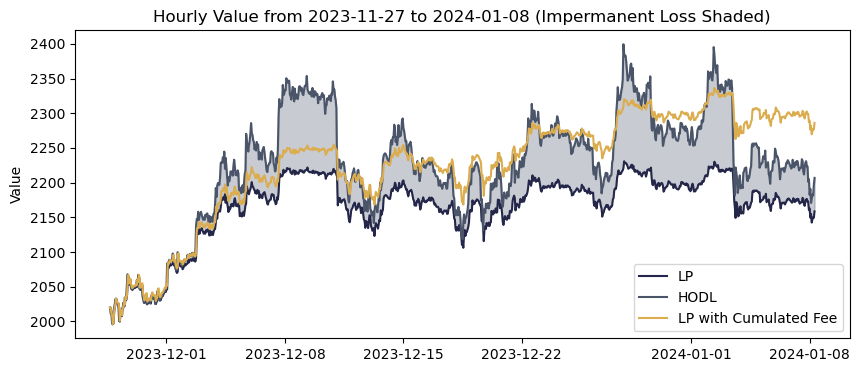

In [34]:
_ = plt.figure(figsize=(10,4))
ax = sns.lineplot(data=final3, x='date', y='amountVlast', label='LP', color='#242749')
sns.lineplot(data=final3, x='date', y='HODL', label='HODL', color='#4B5569')
sns.lineplot(x=final3.date, y=final3.amountVlast + final3.feecumsum, label='LP with Cumulated Fee', color='#DBAD4F')

ax.fill_between(final3.date, list(final3.amountV), list(final3.HODL), color='#4B5569', alpha=0.3)

plt.rcParams.update({'font.sans-serif':'DejaVu Sans'})

plt.title('Hourly Value from {} to {} (Impermanent Loss Shaded)'.format(
    datetime.utcfromtimestamp(dpd.periodStartUnix.min()).strftime('%Y-%m-%d'), 
    datetime.utcfromtimestamp(dpd.periodStartUnix.max()).strftime('%Y-%m-%d')))
plt.ylabel('Value')
plt.xlabel(None)
# plt.savefig('./img/IL_hedge.png', dpi=500, bbox_inches='tight', transparent=True)
plt.show()

## Cross Validation with Alternative IL Calculation

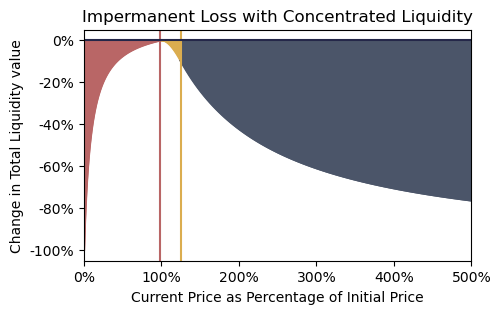

In [30]:
pu = maxi / initial_price
pl = mini / initial_price

_ = plt.figure(figsize=(5,3))
# Setting the background color of the plot 
ax = plt.axes()
# ax.set_facecolor("#F0EEDC")

x1 = np.linspace(0, pl, 100)
y1 = (np.sqrt(pl) + x1 / np.sqrt(pl) - 1 - x1) / (1 + x1 - np.sqrt(pl) - x1 / np.sqrt(pu))

x2 = np.linspace(pl, pu, 100)
y2 = (2 * np.sqrt(x2) - 1 - x2) / (1 + x2 - np.sqrt(pl) - x2 / np.sqrt(pu))

x3 = np.linspace(pu, 5, 100)
y3 = (x3 / np.sqrt(pu) + np.sqrt(pu) - 1 - x3) / (1 + x3 - np.sqrt(pl) - x3 / np.sqrt(pu))

plt.plot(x1, y1, color='#B96666')
ax.fill_between(x1, 0, y1, color='#B96666')

plt.plot(x2, y2, color='#DBAD4F')
ax.fill_between(x2, 0, y2, color='#DBAD4F')

plt.plot(x3, y3, color='#4B5569')
ax.fill_between(x3, 0, y3, color='#4B5569')

plt.axvline(x=pl, color='#B96666')
plt.axvline(x=pu, color='#DBAD4F')

plt.axhline(color='#242749')
ax.set_ylim(-1.05, 0.05)
plt.xlim(0, 5)

plt.rcParams.update({'font.sans-serif':'DejaVu Sans'})

vals_y = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(vals_y))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals_y])
vals_x = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(vals_x))
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals_x])

plt.title('Impermanent Loss with Concentrated Liquidity')
plt.ylabel('Change in Total Liquidity value')
plt.xlabel('Current Price as Percentage of Initial Price')
# plt.savefig('./img/IL_hedge.png', dpi=500, bbox_inches='tight', transparent=True)
plt.show()

In [31]:
final3['k'] = final3.close / initial_price
final3['IL_percentage'] = (2 * np.sqrt(final3['k']) - 1 - final3['k']) / (1 + final3['k'] - np.sqrt(pl) - final3['k'] / np.sqrt(pu))
final3['IL_new'] = (1 + final3['IL_percentage']) * final3['HODL']

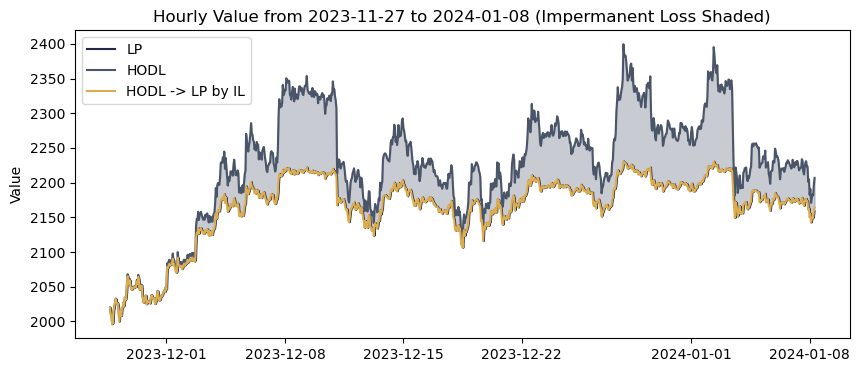

In [35]:
_ = plt.figure(figsize=(10,4))
ax = sns.lineplot(data=final3, x='date', y='amountVlast', label='LP', color='#242749')
sns.lineplot(data=final3, x='date', y='HODL', label='HODL', color='#4B5569')
sns.lineplot(data=final3, x='date', y='IL_new', label='HODL -> LP by IL', color='#DBAD4F')

ax.fill_between(final3.date, list(final3.amountV), list(final3.HODL), color='#4B5569', alpha=0.3)

plt.rcParams.update({'font.sans-serif':'DejaVu Sans'})

plt.title('Hourly Value from {} to {} (Impermanent Loss Shaded)'.format(
    datetime.utcfromtimestamp(dpd.periodStartUnix.min()).strftime('%Y-%m-%d'), 
    datetime.utcfromtimestamp(dpd.periodStartUnix.max()).strftime('%Y-%m-%d')))
plt.ylabel('Value')
plt.xlabel(None)
# plt.savefig('./img/IL_hedge.png', dpi=500, bbox_inches='tight', transparent=True)
plt.show()

Matchy Matchy !!